In [20]:
import sys
sys.path.append('C:\Users\micmitch\Documents\UBC\GIF\Programs\SimPEG')
import SimPEG as simpeg
import simpegDCIP as DC

import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:


# Minimum cell size in each direction
dx = 1.
dy = 1.
dz = 1.

# Number of core cells in each direction
nCoreX = 71.
nCoreY = 83.
nCoreZ = 51.

nPadX = 7
nPadY = 7
nPadZ = 7


# Cell widths
# hx = [(dx,nCoreX)]
# hy = [(dy,nCoreY)]
# hz = [(dz,nCoreZ)]
hx = [(dx,nPadX, -1.3),(dx,nCoreX),(dx,nPadX, 1.3)]
hy = [(dy,nPadY, -1.3),(dy,nCoreY),(dy,nPadY, 1.3)]
hz = [(dz,nPadZ, -1.3),(dz,nCoreZ),(dz,nPadZ, 1.3)]

# Calculate X padding distance
hPadX = np.zeros([nPadX+1,1])
hPadX[0] = dx
for i in range (1,nPadX+1):
    hPadX[i] = hPadX[i-1]*1.3

xPadDist = np.max(np.cumsum(hPadX[1:nPadX+1]))

# Calculate Y padding distance
hPadY = np.zeros([nPadY+1,1])
hPadY[0] = dy
for i in range (1,nPadY+1):
    hPadY[i] = hPadY[i-1]*1.3

yPadDist = np.max(np.cumsum(hPadY[1:nPadY+1]))

# Calculate Z padding distance
hPadZ = np.zeros([nPadZ+1,1])
hPadZ[0] = dz
for i in range (1,nPadZ+1):
    hPadZ[i] = hPadZ[i-1]*1.3

zPadDist = np.max(np.cumsum(hPadZ[1:nPadZ+1]))

# Desired Core mesh origin (Bottom SW corner)
x0_core = -10.
y0_core = -22.
z0_core = 0.

# Mesh origin (Bottom SW corner)
x0 = x0_core - xPadDist
y0 = y0_core - yPadDist
z0 = z0_core - zPadDist


In [22]:
mesh = simpeg.Mesh.TensorMesh([hx, hy, hz],[x0,y0,z0])
print mesh

  ---- 3-D TensorMesh ----  
   x0: -32.86
   y0: -44.86
   z0: -22.86
  nCx: 85
  nCy: 97
  nCz: 65
   hx: 6.27, 4.83, 3.71, 2.86, 2.20, 1.69, 1.30, 71*1.00, 1.30, 1.69, 2.20, 2.86, 3.71, 4.83, 6.27
   hy: 6.27, 4.83, 3.71, 2.86, 2.20, 1.69, 1.30, 83*1.00, 1.30, 1.69, 2.20, 2.86, 3.71, 4.83, 6.27
   hz: 6.27, 4.83, 3.71, 2.86, 2.20, 1.69, 1.30, 51*1.00, 1.30, 1.69, 2.20, 2.86, 3.71, 4.83, 6.27


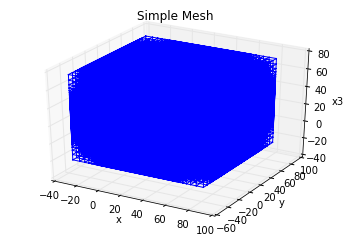

In [38]:
mesh.plotGrid()
plt.title('Simple Mesh')
plt.xlabel('x')
plt.ylabel('y')
# ax.set_zlabel('z')

In [39]:
# Create synthetic model
sigmaFull = 1e-4
sigma = np.ones(mesh.nC)*sigmaFull

# Add tunnels
sigmaTunnel = 1e-8

t1_1 = np.array([2,49,24])
t1_2 = np.array([5,15,27])
tunnel1 = simpeg.Utils.ModelBuilder.getIndicesBlock(t1_1,t1_2, mesh.gridCC)
sigma[tunnel1] = sigmaTunnel

t2_1 = [2,49,24];
t2_2 = [49,46,27];
tunnel2 = simpeg.Utils.ModelBuilder.getIndicesBlock(t2_1,t2_2, mesh.gridCC)
sigma[tunnel2] = sigmaTunnel

t3_1 = [46,49,24];
t3_2 = [49,-10,27];
tunnel3 = simpeg.Utils.ModelBuilder.getIndicesBlock(t3_1,t3_2, mesh.gridCC)
sigma[tunnel3] = sigmaTunnel

# Add conductive block
sigmaBlk1 = 10;
b1_1 = [20,30,16];
b1_2 = [30,20,35];
blk1 = simpeg.Utils.ModelBuilder.getIndicesBlock(b1_1,b1_2, mesh.gridCC)
sigma[blk1] = sigmaBlk1

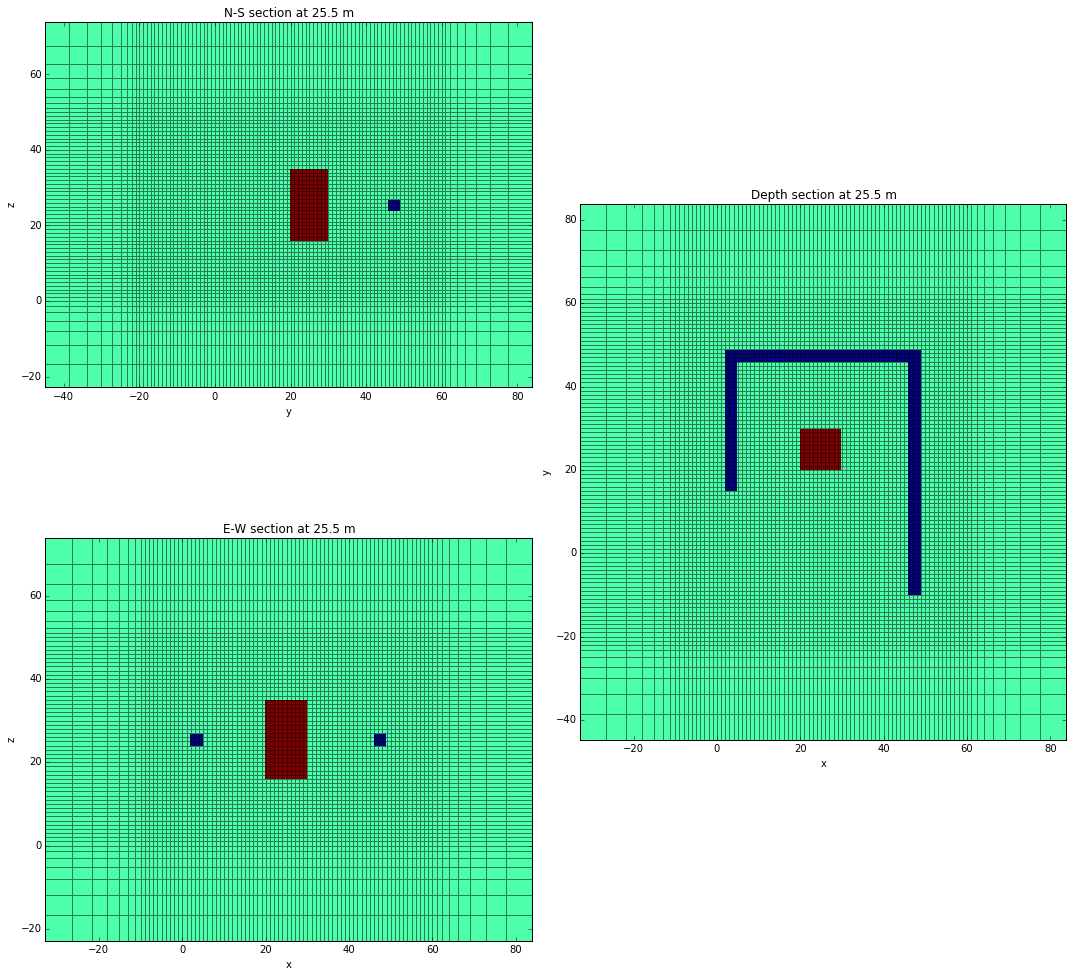

In [40]:
xSliceInd = 42
ySliceInd = 54
zSliceInd = 32
# xSliceInd = int(mesh.nCx/2)
# print xSliceInd
# ySliceInd = int(mesh.nCy/2)
# print ySliceInd
# zSliceInd = int(mesh.nCz/2)
# print zSliceInd


gs = gridspec.GridSpec(4, 4)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = plt.subplot(gs[0:2, 0:2])
# ax = plt.subplot(3,1,1, aspect='equal')
mesh.plotSlice(np.log10(sigma), ax =ax1, normal='X', ind=xSliceInd, grid=True)
ax1.set_title('N-S section at '+str(mesh.vectorCCx[xSliceInd])+' m')
plt.gca().set_aspect('equal', adjustable='box')

ax2 = plt.subplot(gs[2:4, 0:2])
# ax = plt.subplot(3,1,2, aspect='equal')
mesh.plotSlice(np.log10(sigma), ax =ax2, normal='Y', ind=ySliceInd, grid=True)
ax2.set_title('E-W section at '+str(mesh.vectorCCy[ySliceInd])+' m')
plt.gca().set_aspect('equal', adjustable='box')

ax3 = plt.subplot(gs[0:4, 2:4])
# ax = plt.subplot(3,1,3, aspect='equal')
mesh.plotSlice(np.log10(sigma), ax =ax3, normal='Z', ind=zSliceInd, grid=True)
ax3.set_title('Depth section at '+str(mesh.vectorCCz[zSliceInd])+' m')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()


# How would I plot these using a log colorscale (to see tunnel cells) and insert a colorbar?

In [41]:
# Define electrode locations
elecLoc = np.array([[5.5, 15.5, 25.5], 
    [ 5.5, 20.5, 25.5 ],
    [ 5.5, 25.5, 25.5 ],
    [ 5.5, 30.5, 25.5 ],
    [ 5.5, 35.5, 25.5 ],
    [ 5.5, 40.5, 25.5 ],
    [ 5.5, 45.5, 25.5 ],
    [ 10.5, 45.5, 25.5 ],
    [ 15.5, 45.5, 25.5 ],
    [ 20.5, 45.5, 25.5 ],
    [ 25.5, 45.5, 25.5 ],
    [ 30.5, 45.5, 25.5 ],
    [ 35.5, 45.5, 25.5 ],
    [ 40.5, 45.5, 25.5 ],
    [ 45.5, 45.5, 25.5 ],
    [ 45.5, 40.5, 25.5 ],
    [ 45.5, 35.5, 25.5 ],
    [ 45.5, 30.5, 25.5 ],
    [ 45.5, 25.5, 25.5 ],
    [ 45.5, 20.5, 25.5 ],
    [ 45.5, 15.5, 25.5 ],
    [ 45.5, 10.5, 25.5 ],
    [ 45.5,  5.5, 25.5 ],
    [ 45.5,  0.5, 25.5 ],
    [ 45.5, -4.5, 25.5 ],
    [ 45.5, -9.5, 25.5 ]])



In [42]:
# Create electrode sequence

# Combinations of electrodes for dipole-dipole measurements

nElec = elecLoc.shape[0]
# elecInd = np.linspace(0,nElec-1,nElec-1)
elecInd = np.arange(nElec)
elecSeqObj = itertools.combinations(elecInd,4) # n choose k combinations

# Extract data from combinations object
elecSeqList = []
for i in elecSeqObj:
    elecSeqList.append(tuple(i))
    
elecSeq = np.array(elecSeqList)
# elecSeq.shape

# Take permutations of each combination
FullElecSeqList = []
for row in elecSeq:
    permObj = itertools.permutations(row)
    for j in permObj:
        FullElecSeqList.append(tuple(j))
        
FullElecSeq = np.array(FullElecSeqList)
# FullElecSeq.shape
# check = FullElecSeq[0:30,:]
# print check


# Sort FullElecSeq by Tx columns
FullElecSeq_Tx = FullElecSeq[:,0:2].copy() #np.hstack([[FullElecSeq[:,0:1]], [FullElecSeq[:,1:2]]])

FullElecSeq_TxSort = np.array(np.sort(FullElecSeq_Tx, axis=1))


# Sort FullElecSeq by Rx columns
FullElecSeq_Rx = FullElecSeq[:,2:4].copy() 

FullElecSeq_RxSort = np.array(np.sort(FullElecSeq_Rx, axis=1))


# Combine sorted Tx and Rx arrays
FullElecSeq_Combined = np.hstack([FullElecSeq_TxSort,FullElecSeq_RxSort])
# check = FullElecSeq_Combined[0:30,:]
# print check
FullElecSeq_Combined.shape


# Find unique rows
def unique_rows(A, return_index=False, return_inverse=False):
    """
    Similar to MATLAB's unique(A, 'rows'), this returns B, I, J
    where B is the unique rows of A and I and J satisfy
    A = B[J,:] and B = A[I,:]

    Returns I if return_index is True
    Returns J if return_inverse is True
    
    From bfroehle (https://github.com/numpy/numpy/issues/2871) 
    """
    A = np.require(A, requirements='C')
    assert A.ndim == 2, "array must be 2-dim'l"

    B = np.unique(A.view([('', A.dtype)]*A.shape[1]),
               return_index=return_index,
               return_inverse=return_inverse)

    if return_index or return_inverse:
        return (B[0].view(A.dtype).reshape((-1, A.shape[1]), order='C'),) \
            + B[1:]
    else:
        return B.view(A.dtype).reshape((-1, A.shape[1]), order='C')
    
FullElecSeq_Unique  = unique_rows(FullElecSeq_Combined)
# print FullElecSeq_Unique.shape
# print FullElecSeq_Unique[1:20,:]
# print FullElecSeq_Unique[-20::,:]


In [43]:
# Create Tx and Rx data objects for the survey object

TxKey = unique_rows(FullElecSeq_Unique[:,0:2]);
# print TxKey

nTx = TxKey.shape[0]
# print nTx

nData = FullElecSeq_Unique.shape[0]
# print nData

AIds = FullElecSeq_Unique[:,0]
BIds = FullElecSeq_Unique[:,1]
MIds = FullElecSeq_Unique[:,2]
NIds = FullElecSeq_Unique[:,3]

ALoc = np.zeros([nData,3])
BLoc = np.zeros([nData,3])
MLoc = np.zeros([nData,3])
NLoc = np.zeros([nData,3])

for i in range(0, nElec-1):
    AInd = np.where(AIds == i)
    ALoc[AInd,:] = elecLoc[i,:]
    
    BInd = np.where(BIds == i)
    BLoc[BInd,:] = elecLoc[i,:]
    
    MInd = np.where(MIds == i)
    MLoc[MInd,:] = elecLoc[i,:]
    
    NInd = np.where(NIds == i)
    NLoc[NInd,:] = elecLoc[i,:]


RxData = DC.RxDipole(MLoc, NLoc)
TxData = DC.SrcDipole([RxData], [ALoc],[BLoc])

In [44]:
# Assign TxData to DC survey object
survey = DC.SurveyDC([TxData])
# Assign mesh to probelm object
problem = DC.ProblemDC_CC(mesh)
# Pair survey with problem
problem.pair(survey)

In [45]:
try:
    from pymatsolver import MumpsSolver
    problem.Solver = MumpsSolver
except Exception, e:
    problem.Solver = SolverLU



NameError: name 'SolverLU' is not defined

In [19]:
sigmaBackground = np.ones(mesh.nC)*sigmaFull

# %%time
dataPred = survey.dpred(sigmaBackground)

TypeError: not all arguments converted during string formatting

In [ ]:
u1 = problem.fields(sigma)
u2 = problem.fields(sigmaBackground)

In [ ]:
Msig1 = Utils.sdiag(1./(mesh.aveF2CC.T*(1./sigma)))
Msig2 = Utils.sdiag(1./(mesh.aveF2CC.T*(1./sigmaBackground)))


In [ ]:
j1 = Msig1*mesh.cellGrad*u1[tx, 'phi_sol']
j2 = Msig2*mesh.cellGrad*u2[tx, 'phi_sol']

In [ ]:
us = u1-u2
js = j1-j2


In [ ]:
mesh.plotSlice(mesh.aveF2CCV*j1, vType='CCv', normal='Y', view='vec', streamOpts={"density":3, "color":'w'})
xlim(-300, 300)
ylim(-300, 0)

In [ ]:
mesh.plotSlice(mesh.aveF2CCV*js, vType='CCv', normal='Y', view='vec', streamOpts={"density":3, "color":'w'})
xlim(-300, 300)
ylim(-300, 0)

In [46]:
problem.Solver??